# Titanica data set

In [2]:
import pandas as pd
train_df = pd.read_csv("../data/titanic-train.csv")

In [3]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
train_df["sex"] = train_df["sex"].apply(lambda sex: 0 if sex == 'male' else 1)

In [6]:
y = targets = labels = train_df["survived"].values

In [11]:
columns = ["fare", "pclass", "sex", "age", "sibsp"]
features = train_df[list(columns)].values
features

array([[  7.25  ,   3.    ,   0.    ,  22.    ,   1.    ],
       [ 71.2833,   1.    ,   1.    ,  38.    ,   1.    ],
       [  7.925 ,   3.    ,   1.    ,  26.    ,   0.    ],
       ..., 
       [ 23.45  ,   3.    ,   1.    ,      nan,   1.    ],
       [ 30.    ,   1.    ,   0.    ,  26.    ,   0.    ],
       [  7.75  ,   3.    ,   0.    ,  32.    ,   0.    ]])

In [12]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(features)
X

array([[  7.25      ,   3.        ,   0.        ,  22.        ,   1.        ],
       [ 71.2833    ,   1.        ,   1.        ,  38.        ,   1.        ],
       [  7.925     ,   3.        ,   1.        ,  26.        ,   0.        ],
       ..., 
       [ 23.45      ,   3.        ,   1.        ,  29.69911765,   1.        ],
       [ 30.        ,   1.        ,   0.        ,  26.        ,   0.        ],
       [  7.75      ,   3.        ,   0.        ,  32.        ,   0.        ]])

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X, y)

In [15]:
from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf, out_file=f, feature_names=columns)

In [ ]:
! apt-get install graphviz -y; dot -Tpng titanic.dot -o titanic.png

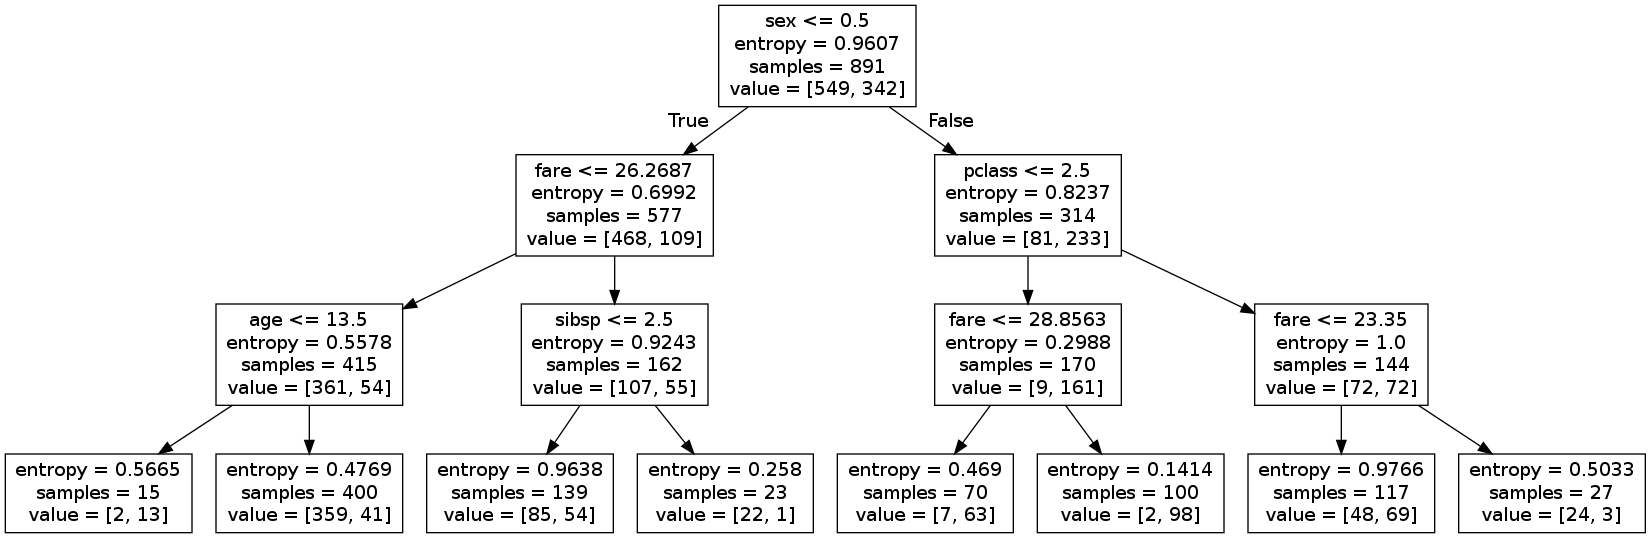

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("titanic.png")